
## Pré-Processing

Neste jupyter notebook, iremos realizar uma análise comparativa entre os extratores de features da face: MediaPipe e Dlib

As features foram extraídas utilizando as seguintes configurações de máquina:
    
    - 15,4 GiB
    - 11th Gen Intel® Core™ i5-1135G7 @ 2.40GHz × 8 
    - Mesa Intel® Xe Graphics (TGL GT2)
    - 256,1 GB
    - Ubuntu 20.04.3 LTS
    - 64 bits
    
Foram utilizados 591 vídeos da base UCF-101, ou seja, todos os vídeos das classes de:
    - ApplyEyeMakeup
    - BrushingTeeth
    - PlayingFlute
    - ShavingBeard
    
A escolha dessas classes de comportamentos, tem como justificativa classes de comportamento que de certa forma enfatizam a face humana durante os vídeos, utilizando movimentos, interações com objetos e cenas com oclusão da face sejam por esses objetos ou membro do corpo, ou pelo movimento associado ao comportamento.

In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# EDA

In [2]:
def pre_processed(inputs, label_augmentation):
    
    """
    **DESCRIÇÃO:
    Essa função é responsável por coletar todos os arquivos de features 
    de cada vídeo da base submetida aos extratores e concatená-los em um único arquivo.
    
    **INPUT:
    inputs: dicionário de extrator vs path dos dados preprocessados csv.
    label_augmentation: label do nome da técnica de augmentation utilizada.
    
    **OUTPUT:
    combined_csv: Arquivo csv com as informações dos extratores concatenados.
    
    """
    
    print(inputs['dlib'])
    extension = 'csv'
    
    label_dlib = 'dlib'+label_augmentation
    label_mediapipe = 'mediapipe'+label_augmentation
    print("----- Pré concat -----")
    
    #Dlib
    all_filenames = [i for i in glob.glob(inputs['dlib']+'*.{}'.format(extension))]
    combined_csv_dlib = pd.concat([pd.read_csv(f, sep=";", index_col=None) for f in all_filenames ])
    combined_csv_dlib['extractor'] = label_dlib
    print("Quantidade de Vídeos [Dlib]: "+str(len(all_filenames)))
    print('Quantidade de Frames [Dlib]: '+str(combined_csv_dlib.shape[0]))
    
    #Mediapipe
    all_filenames = [i for i in glob.glob(inputs['mediapipe']+'*.{}'.format(extension))] 
    combined_csv_mediapipe = pd.concat([pd.read_csv(f, sep=";", index_col=None) for f in all_filenames ])
    combined_csv_mediapipe['extractor'] = label_mediapipe
    print("Quantidade de Vídeos [Mediapipe]: "+str(len(all_filenames)))
    print('Quantidade de Frames [Mediapipe]: '+str(combined_csv_mediapipe.shape[0]))
    
    #Concat
    print("----- Pós concat -----")
    combined_csv = pd.concat([combined_csv_dlib, combined_csv_mediapipe], axis=0)
    print('Linhas, Colunas: '+str(combined_csv.shape))
    print('Quantidade de Frames [Dlib]: '+str(combined_csv.loc[combined_csv.extractor == label_dlib].shape))
    print('Quantidade de Frames [Mediapipe]: '+str(combined_csv.loc[combined_csv.extractor == label_mediapipe].shape))

    print("----- Description -----")
    mdnna = (len(combined_csv.loc[(combined_csv.extractor == label_mediapipe) & (combined_csv['keys'].notna())])/len(combined_csv))
    mdna = (len(combined_csv.loc[(combined_csv.extractor == label_mediapipe) & (combined_csv['keys'].isna())])/len(combined_csv))
    dbnna = (len(combined_csv.loc[(combined_csv.extractor == label_dlib) & (combined_csv['keys'].notna())])/len(combined_csv))
    dbna = (len(combined_csv.loc[(combined_csv.extractor == label_dlib) & (combined_csv['keys'].isna())])/len(combined_csv))


    print("Porcentagem frames com landmarks detectados Mediapipe: {:.2f}%".format(mdnna))
    print("Porcentagem frames com landmarks NÃO detectados Mediapipe: {:.2f}%".format(mdna))
    print("Porcentagem frames com landmarks detectados Dlib: {:.2f}%".format(dbnna))
    print("Porcentagem frames com landmarks NÃO detectados Dlib: {:.2f}%".format(dbna))
    
    combined_csv['na'] = np.where(combined_csv['keys'].isna(), 1, 0)
    
    return combined_csv

In [3]:
inputs = {
    'dlib': '../../data/processed/dlib/UCF-101-Analysis/',
    'mediapipe': '../../data/processed/mediapipe/UCF-101-Analysis/'
}

combined_csv = pre_processed(inputs, '')
combined_csv['class'] = combined_csv['video_name'].str.split('_', expand=True)[1]

../../data/processed/dlib/UCF-101-Analysis/
----- Pré concat -----
Quantidade de Vídeos [Dlib]: 592
Quantidade de Frames [Dlib]: 134484
Quantidade de Vídeos [Mediapipe]: 592
Quantidade de Frames [Mediapipe]: 134484
----- Pós concat -----
Linhas, Colunas: (268968, 5)
Quantidade de Frames [Dlib]: (134484, 5)
Quantidade de Frames [Mediapipe]: (134484, 5)
----- Description -----
Porcentagem frames com landmarks detectados Mediapipe: 0.41%
Porcentagem frames com landmarks NÃO detectados Mediapipe: 0.09%
Porcentagem frames com landmarks detectados Dlib: 0.16%
Porcentagem frames com landmarks NÃO detectados Dlib: 0.34%


In [4]:
df_geral = pd.DataFrame(columns=['extractor', 'total_notna'])

df_geral = df_geral.append(
[{
    'extractor': 'dlib',
    'total_notna': int(combined_csv.loc[combined_csv.extractor == 'dlib']['keys'].notna().sum())
},
{ 
    'extractor': 'mediapipe',
    'total_notna': int(combined_csv.loc[combined_csv.extractor == 'mediapipe']['keys'].notna().sum())
}],
    
ignore_index=True)

df_geral

,extractor,total_notna
0,dlib,43212
1,mediapipe,110407


In [5]:
combined_csv

,Unnamed: 0,frame,video_name,keys,extractor,na,class
0,0,1,v_BrushingTeeth_g21_c04.avi,"[[72, 26], [69, 47], [70, 69], [75, 92], [84, ...",dlib,0,BrushingTeeth
1,1,2,v_BrushingTeeth_g21_c04.avi,"[[85, 30], [82, 48], [83, 68], [87, 86], [91, ...",dlib,0,BrushingTeeth
2,2,3,v_BrushingTeeth_g21_c04.avi,"[[75, 31], [74, 50], [75, 71], [79, 91], [84, ...",dlib,0,BrushingTeeth
3,3,4,v_BrushingTeeth_g21_c04.avi,"[[76, 29], [74, 48], [75, 69], [78, 89], [84, ...",dlib,0,BrushingTeeth
4,4,5,v_BrushingTeeth_g21_c04.avi,"[[76, 28], [73, 47], [74, 68], [77, 87], [82, ...",dlib,0,BrushingTeeth
...,...,...,...,...,...,...,...
176,176,177,v_ApplyEyeMakeup_g20_c06.avi,"[[0.444952130317688, 0.608574628829956, -0.057...",mediapipe,0,ApplyEyeMakeup
177,177,178,v_ApplyEyeMakeup_g20_c06.avi,"[[0.4460960924625397, 0.6079461574554443, -0.0...",mediapipe,0,ApplyEyeMakeup
178,178,179,v_ApplyEyeMakeup_g20_c06.avi,"[[0.44672197103500366, 0.60645592212677, -0.05...",mediapipe,0,ApplyEyeMakeup
179,179,180,v_ApplyEyeMakeup_g20_c06.avi,"[[0.4513989984989166, 0.6069037318229675, -0.0...",mediapipe,0,ApplyEyeMakeup


# Análise

## No Geral

In [6]:
def plot_var_geral(df, extractors):
    # plot
    fig = plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)

    colors = ['green',"red"]
    df1 = df.loc[df.extractor == extractors['extractor1']]
    ax = sns.countplot(x="extractor", hue="na", data=df1, palette=colors)
    ax.set(ylabel='Total of Frames', title='Bar Count and Percent of Total')

    # add annotations
    for c in ax.containers:
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w/len(df1.index)*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')


    plt.subplot(2,2,2)
    df2 = df.loc[df.extractor == extractors['extractor2']]
    ax = sns.countplot(x="extractor", hue="na", data=df2, palette=colors)
    ax.set(ylabel='Total of Frames', title='Bar Count and Percent of Total')

    # add annotations
    for c in ax.containers:
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w/len(df2.index)*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

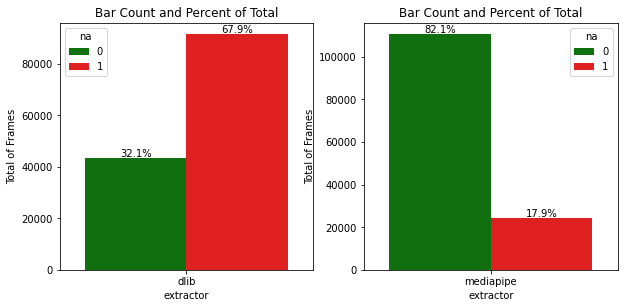

In [7]:
extractors = {
    'extractor1': 'dlib',
    'extractor2': 'mediapipe'
}

plot_var_geral(combined_csv, extractors)

In [8]:
82.1 - 32.1

49.99999999999999

Na figura acima é possível visualizar que dos 134.484 frames da base selecionada para a análise, apenas em 32,1% frames desse total, o Dlib foi capaz de reconhecer os landmarks da face. Enquanto que o extrator Mediapipe conseguiu detectar os landmarks em 82,1% dos frames. Portanto, de maneira geral, temos que com o extrator de features Mediapipe foi possível detectar landmarks em 50% de frames a mais que no Dlib.


## Por Classe

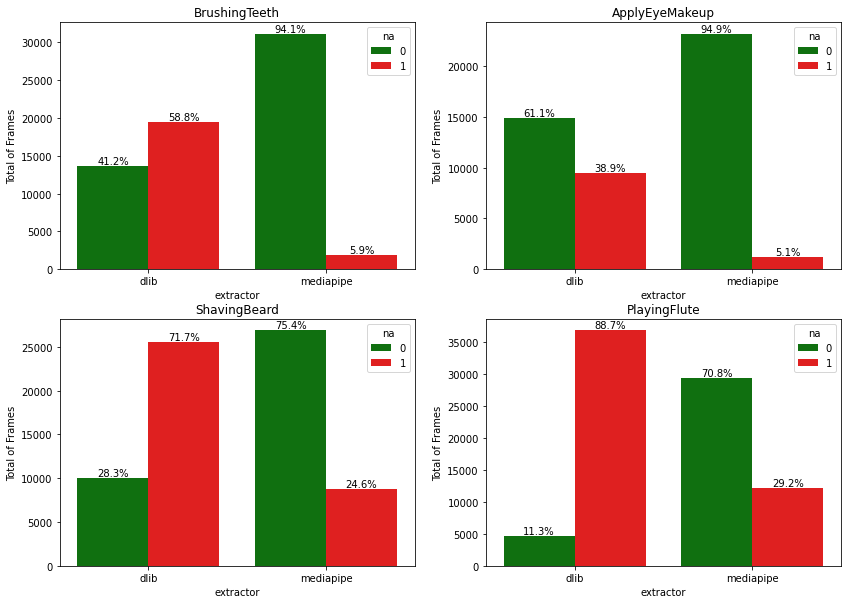

In [9]:
fig = plt.figure(figsize=(14,10))
count = 1
colors = ['green',"red"]

for i in combined_csv['class'].unique():
    #col, row, order
    plt.subplot(2,2, count)
    df = combined_csv.loc[combined_csv['class'] == i]
    ax = sns.countplot(x="extractor", hue="na", data=df, palette=colors)
    ax.set(ylabel='Total of Frames', title=i)
    for c in ax.containers:
        labels = [f'{w/len(df.index)*200:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    count+=1
    

Tanto para o extrator Mediapipe quanto para o Dlib, a classe em que foi retornada mais frames com informações da face foi a ApplyEyeMakeup com 61,1% e 94,9% respectivamente (diferença de 33,8%). Enquanto que para a classe de comportamento PlayingFlute, ambos os extratores de features retornaram os valores mais baixos de frames com features detectadas, o Mediapipe 70,8% e o Dlib 11,3% (diferença de 29,8%). 

## Por momentos específicos de uma amostra [Selected]

In [10]:
videos = os.listdir('../../data/raw/UCF-101-Analysis-Selected/')
data_selected = combined_csv.loc[combined_csv.video_name.isin(videos)]
print(data_selected.shape)

(1684, 7)


In [11]:
total = len(data_selected.loc[data_selected['extractor'] == 'mediapipe'])
dlib_na = len(data_selected.loc[
    (data_selected['extractor'] == 'dlib') & (data_selected['na'] == 1)])
mediapipe_na = len(data_selected.loc[
    (data_selected['extractor'] == 'mediapipe') & (data_selected['na'] == 1)])

print("Total de Frames para cada Extrator: {} ({:.2f}%)".format(total, (total/total)*100))
print("Total de Frames N/A Dlib: {} ({:.2f}% de todos os frames submetidos ao extrator)".format(dlib_na, (dlib_na/total)*100))
print("Total de Frames N/A MediaPipe: {} ({:.2f}% de todos os frames submetidos ao extrator)" .format(mediapipe_na, (mediapipe_na/total)*100))


Total de Frames para cada Extrator: 842 (100.00%)
Total de Frames N/A Dlib: 674 (80.05% de todos os frames submetidos ao extrator)
Total de Frames N/A MediaPipe: 412 (48.93% de todos os frames submetidos ao extrator)


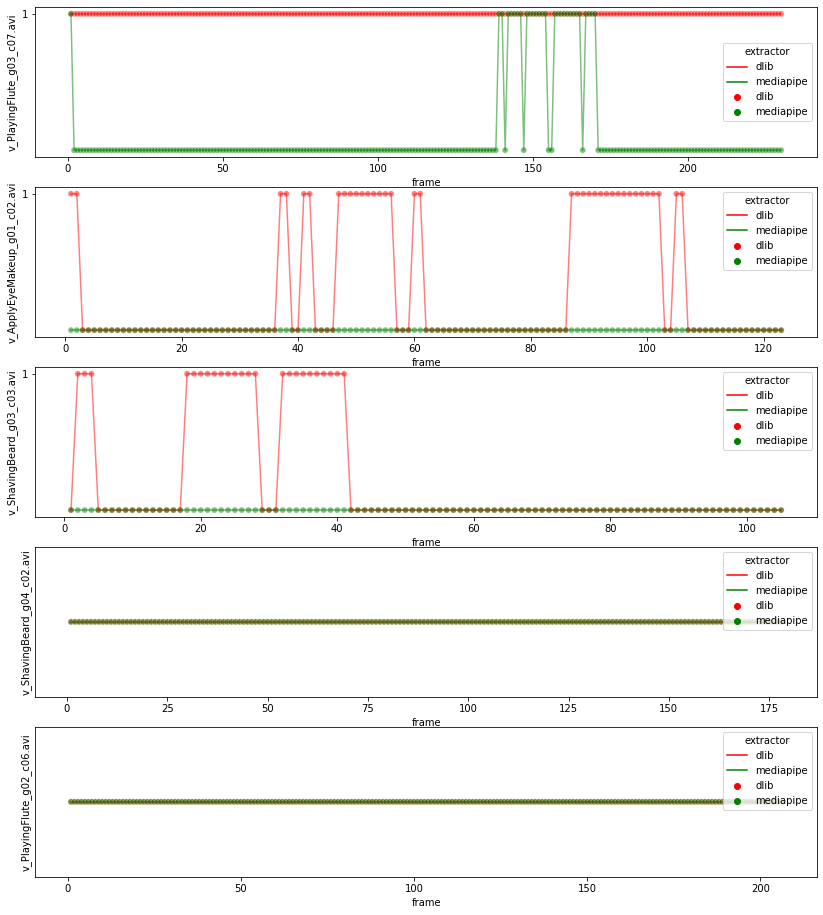

In [12]:
import matplotlib.ticker as ticker


fig = plt.figure(figsize=(14,16))
count = 1 

for i in videos:
    #col, row, order
    df = data_selected.loc[data_selected.video_name ==i].copy()
    df['na'] = df['na'].astype(int)
    plt.subplot(5,1, count)
    ax = sns.lineplot(data=df, x="frame", y="na", hue="extractor", palette=['red', 'green'], alpha = 0.5)
    sns.scatterplot(data=df, x="frame", y="na", hue="extractor", palette=['red', 'green'], alpha = 0.5)
    ax.set(ylabel=i)#, title=i
    #frames = combined_csv.loc[(combined_csv.video_name == i) & (combined_csv.na == 1)][['frame', 'extractor']]
    #display(frames)
    ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=1))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    count= count+1

In [13]:
#Case detectado no MediaPipe e não detectado no Dlib

data_selected.loc[(data_selected['video_name'] == 'v_ApplyEyeMakeup_g01_c02.avi') & (data_selected['frame'] == 1)]

,Unnamed: 0,frame,video_name,keys,extractor,na,class
0,0,1,v_ApplyEyeMakeup_g01_c02.avi,NaN,dlib,1,ApplyEyeMakeup
0,0,1,v_ApplyEyeMakeup_g01_c02.avi,"[[0.831613302230835, 0.5354393720626831, -0.03...",mediapipe,0,ApplyEyeMakeup


In [14]:
#Case detectado por ambos extratores

data_selected.loc[(data_selected['video_name'] == 'v_ApplyEyeMakeup_g01_c02.avi') & (data_selected['frame'] == 3)]

,Unnamed: 0,frame,video_name,keys,extractor,na,class
2,2,3,v_ApplyEyeMakeup_g01_c02.avi,"[[193, 74], [190, 93], [189, 113], [191, 131],...",dlib,0,ApplyEyeMakeup
2,2,3,v_ApplyEyeMakeup_g01_c02.avi,"[[0.8323194980621338, 0.5438323020935059, -0.0...",mediapipe,0,ApplyEyeMakeup


In [15]:
#Case não detectado por ambos extratores

data_selected.loc[(data_selected['video_name'] == 'v_PlayingFlute_g03_c07.avi') & (data_selected['frame'] == 150)]

,Unnamed: 0,frame,video_name,keys,extractor,na,class
149,149,150,v_PlayingFlute_g03_c07.avi,NaN,dlib,1,PlayingFlute
149,149,150,v_PlayingFlute_g03_c07.avi,NaN,mediapipe,1,PlayingFlute


In [16]:
#Contagem de N/As

df_na = data_selected.loc[data_selected.na == 1][['frame','video_name','extractor','na']]
#Contagem de NA por frame. Se retornar 2, nenhum dos extratores deu sucesso.
df_na["count"] = df_na.groupby(['frame', 'video_name'])["na"].transform('count')
df_na.head(10)

,frame,video_name,extractor,na,count
0,1,v_ShavingBeard_g04_c02.avi,dlib,1,2
1,2,v_ShavingBeard_g04_c02.avi,dlib,1,2
2,3,v_ShavingBeard_g04_c02.avi,dlib,1,2
3,4,v_ShavingBeard_g04_c02.avi,dlib,1,2
4,5,v_ShavingBeard_g04_c02.avi,dlib,1,2
5,6,v_ShavingBeard_g04_c02.avi,dlib,1,2
6,7,v_ShavingBeard_g04_c02.avi,dlib,1,2
7,8,v_ShavingBeard_g04_c02.avi,dlib,1,2
8,9,v_ShavingBeard_g04_c02.avi,dlib,1,2
9,10,v_ShavingBeard_g04_c02.avi,dlib,1,2


### Cases

In [17]:
print("Quantos frames o MediaPipe detectou e que o Dlib não detectou? "+str(len(df_na.loc[(df_na['count'] == 1) & (df_na['extractor'] == 'dlib')])))
print("Quantos frames o Dlib detectou e que o MediaPipe não detectou? "+str(len(df_na.loc[(df_na['count'] == 1) & (df_na['extractor'] == 'mediapipe')])))
print("Quantos frames nem o Dlib e nem o Mediapipe detectaram? "+str(len(df_na.loc[df_na['count'] == 2])))

Quantos frames o MediaPipe detectou e que o Dlib não detectou? 262
Quantos frames o Dlib detectou e que o MediaPipe não detectou? 0
Quantos frames nem o Dlib e nem o Mediapipe detectaram? 824


## Análise Visual

In [18]:
#os.chdir('../../../../notebooks/feature_extraction/')
path_visual = './data/vis1-videos/'
l_videos = sorted(os.listdir(path_visual))
print(l_videos)

['v_ApplyEyeMakeup_g01_c02-dlib.avi', 'v_ApplyEyeMakeup_g01_c02-mediapipe.avi', 'v_PlayingFlute_g02_c06-dlib.avi', 'v_PlayingFlute_g02_c06-mediapipe.avi', 'v_PlayingFlute_g03_c07-dlib.avi', 'v_PlayingFlute_g03_c07-mediapipe.avi', 'v_ShavingBeard_g03_c03-dlib.avi', 'v_ShavingBeard_g03_c03-mediapipe.avi', 'v_ShavingBeard_g04_c02-dlib.avi', 'v_ShavingBeard_g04_c02-mediapipe.avi']


In [19]:
import mediapy as media
import cv2

video1 = media.read_video(path_visual+str(l_videos[0]))
video2 = media.read_video(path_visual+str(l_videos[1]))
video3 = media.read_video(path_visual+str(l_videos[2]))
video4 = media.read_video(path_visual+str(l_videos[3]))
video5 = media.read_video(path_visual+str(l_videos[4]))
video6 = media.read_video(path_visual+str(l_videos[5]))
video7 = media.read_video(path_visual+str(l_videos[6]))
video8 = media.read_video(path_visual+str(l_videos[7]))
video9 = media.read_video(path_visual+str(l_videos[8]))
video10 = media.read_video(path_visual+str(l_videos[9]))

# Show multiple videos side-by-side.
s = 90
vis_videos = {
    'v_ApplyEyeMakeup_g01_c02-DLIB': video1,
    'v_ApplyEyeMakeup_g01_c02-MEDIAPIPE': video2,
    'v_PlayingFlute_g02_c06-DLIB': video3,
    'v_PlayingFlute_g02_c06-MEDIAPIPE': video4,
    'v_PlayingFlute_g03_c07-DLIB': video5,
    'v_PlayingFlute_g03_c07-MEDIAPIPE': video6,
    'v_ShavingBeard_g03_c03-DLIB': video7,
    'v_ShavingBeard_g03_c03-MEDIAPIPE': video8,
    'v_ShavingBeard_g04_c02-DLIB': video9,
    'v_ShavingBeard_g04_c02-MEDIAPIPE': video10,
    
}
media.show_videos(vis_videos, fps=25, columns=2)

RuntimeError: Program 'ffmpeg' is not found; perhaps install ffmpeg using 'apt-get install ffmpeg'.

No vídeo v_ApplyEyeMakeup_g01_c02 submetido ao Mediapipe, é evidente que quando a personagem fecha o(s) olho(s) para aplicar a maquiagem, o movimento de fechar o olho não é refletido pelo extrator, isto é, conforme o contorno dos olhos da máscara do extrator, os mesmos permanecem abertos durante toda a cena.

Outro ponto interessante apontado nos vídeos v_PlayingFlute_g02_c06 e v_PlayingFlute_g03_c07, ao comparado com os demais, é que as personagens encontram-se um tanto distantes da câmera. A hipótese é que ambos os extratores tenham dificuldade em extrair os landmarks ultrapassando uma determinada distância da câmera. O Dlib em nenhum frame retornou informação de landmarks, enquanto que o Mediapipe, em alguns frames conseguiu capturar os landmarks, no entanto, em alguns deles, o Mediapipe superestimou a face da personagem em locais em que não faziam parte da face da da mesma, alterando até o tamanho e direção da face durante os movimentos da personagem.


Nos vídeos v_ShavingBeard_g03_c03 e v_ApplyEyeMakeup_g01_c02, ambos submetidos ao DLIB, é possível perceber que quando ocorre oclusão pela mão sob a face, as informações dos landmarks não são encontradas.

No vídeo v_ShavingBeard_g03_c03 submetido ao extrator Dlib, grande parte dos momentos que ocorrem oclusão, a face está virada para um dos lados, fato que pode dificultar mais ainda a detecção quando somado a oclusão causada pela mão com a rotação da face.

Já no vídeo v_ApplyEyeMakeup_g01_c02 (Dlib), embora uma parte da face ocluída pela mão, maior que no vídeo v_ShavingBeard_g03_c03 (Dlib), nesse caso a personagem encontra-se com a face totalmente virada para a câmera, o que pode facilitar a estimativa de posição dos landmarks ocluídos pela mão.

No vídeo v_ShavingBeard_g04_c02, nenhum dos extratores retornou informações de landmarks, a hipótese é que a face esteja muito virada para um dos lados, fazendo com que seja praticamente impossível estimar uma face naquele personagem. Outro ponto interessante neste mesmo vídeo é a pequena parte da face retornada no espelho da cena, a qual nenhum dos extratores foi capaz de detectá-la ou estimá-la.


## Direcionamentos de investigação

Pontos para investigar no Dlib e MediaPipe:

1. Qual seria a **distância do personnagem** ideal para identificação de landmarks
2. Quais seriam os limites de **rotação da face** para a capacidade de identificação de landmarks?
3. Quais características o vídeo **v_PlayingFlute_g02_c06** possui que influenciaram na não identificação de landmarks?
4. Considerando um baseline de cenas com movimentos extremos, qual seria a **taxa de fps** adequada para a capacidade de identificação de landmarks?
5. E se os vídeos estivessem **rotacionados 90° (selfie)**, afetaria a capacidade dos extratores?
6. Se durante a identificação de landmarks de um personagem, surgisse um **segundo personagem**? Qual face permaneceria detectada? A do primeiro ou segundo personagem?
7. Se os vídeos estivessem em um ambiente **mais claro** ou **mais escuro**, até que ponto afetaria a detecção de landmarks?
8. **Tamanho do vídeo**
9. **Taxa de agressividade do mediapipe**
10. **Velocidade** do vídeo
11. **Qualidade da imagem**


# Data Augmentation

## Gray Scale

In [ ]:
lt_videos = sorted(os.listdir('data/vis2-videos/'))
print('data/videos/'+lt_videos[1])

video_output = 'data/videos/'

In [ ]:
def create_directory(dirName):
    if not os.path.exists(dirName):
        os.makedirs(dirName)
        print("Directory " , dirName ,  " Created ")
    else:
        print("Directory " , dirName ,  " already exists")
    return dirName


def read_data_with_subdirectorys(data_path):
    videos_path_list = []
    print("List of all directories in '% s':" % data_path)

    for path, subdirs, files in os.walk(data_path):
        for name in files:
            if name.endswith('.avi'):
                videos_path_list.append(os.path.join(path, name))

    return videos_path_list


def convert_gray_scale(input_path, video_output):
    
    files_avi = read_data_with_subdirectorys(input_path)
    
    for j in os.listdir(input_path):
        create_directory(str(video_output)+str(j))
            
    for i in files_avi:
        print(i)
        cap = cv2.VideoCapture(i)

        frame_width = int(cap.get(3)) 
        frame_height = int(cap.get(4)) 
        size = (frame_width, frame_height) 
        result = cv2.VideoWriter(video_output+i.split('UCF-101-Analysis/')[-1],  
                                 cv2.VideoWriter_fourcc(*'MJPG'), 
                                 25, size, isColor=False) 

        if cap.isOpened() == False:
            print("Error opening video stream or file")

        while cap.isOpened():
            _, image = cap.read()

            if _ == True:
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                result.write(gray) 
                #cv2.imshow(video_output, gray)
                #print(video_output+'Gray_'+i)
                if cv2.waitKey(25) & 0xFF == ord("q"):
                    break
            else:
                break

        cv2.destroyAllWindows()
        cap.release()
    
    return 1

In [ ]:
db_input = '../../data/raw/UCF-101-Analysis/'
db_output = create_directory('../../data/raw/UCF-101-Analysis-GrayScale/')

#convert_gray_scale(db_input, db_output)

### No Geral

In [ ]:
inputs = {
    'dlib': '../../data/processed/dlib/UCF-101-Analysis-GrayScale/',
    'mediapipe': '../../data/processed/mediapipe/UCF-101-Analysis-GrayScale/'
}

combined_csv_gray = pre_processed(inputs, '_gray_scale')

extractors = {
    'extractor1': 'dlib_gray_scale',
    'extractor2': 'mediapipe_gray_scale'
}

plot_var_geral(combined_csv_gray, extractors)

In [ ]:
extractors = {
    'extractor1': 'dlib',
    'extractor2': 'mediapipe'
}

plot_var_geral(combined_csv, extractors)

In [ ]:
#Unificando dataframes

columns = ['frame','video_name','keys','extractor','na']
combined_gray_with_original = pd.concat([combined_csv.loc[combined_csv.na==0].reset_index()[columns], 
                                         combined_csv_gray.loc[combined_csv_gray.na==0].reset_index()[columns]], axis=0)
combined_gray_with_original.extractor.unique()

In [ ]:
fig = plt.figure(figsize=(18,10))
plt.subplot(2,2,1)

colors = ['blue', 'gray']
ax = sns.countplot(x="extractor", hue="extractor", data=combined_gray_with_original.sort_values(by='extractor'), 
                   palette=colors)
ax.set(ylabel='Total of Frames', title='Percentual de frames com landmarks identificados')

# add annotations
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w/(len(combined_csv.index)/2)*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [ ]:
#Validação de porcentagens do gráfico [Original]
print("Total: "+str(combined_csv.shape[0]/2))
print('Original:')
print('{:.1f}%'.format(43212/(combined_csv.shape[0]/2)*100))
print('{:.1f}%'.format(110407/(combined_csv.shape[0]/2)*100))

#Validação de porcentagens do gráfico [Escala de Cinza]
print('Escala de Cinza:')
print('{:.1f}%'.format( 42808/(combined_csv_gray.shape[0]/2)*100))
print('{:.1f}%'.format( 99262/(combined_csv_gray.shape[0]/2)*100))

De um total de 134484 frames de toda a base submetidos em cada extrator, obtivemos uma pequena diferença na quantidade de frames com landmarks retornados pelo Dlib, quando os mesmos estavam em escala de cinza, isto é, uma diferença de 0,3%. Já em relação ao Mediapipe, obtivermos uma diferença maior, quando comparado ao Dlib, a quantidade de frames com landmarks retornados dimiuiu em 8,3% ao converter os mesmos para a escala de cinza.

De maneira geral, através desses dados analisados, podemos concluir que o mediapipe é mais sensível quando os frames são convertidos para a escala de cinza, influenciando negativamente na detecção de landmarks da face.

### Por momentos específicos de uma amostra [Selected]

In [ ]:
videos = os.listdir('../../data/raw/UCF-101-Analysis-Selected-GrayScale/')
data_selected_gray = combined_csv_gray.loc[combined_csv_gray.video_name.isin(videos)]
print(data_selected_gray.shape)

In [ ]:
total = len(data_selected_gray.loc[data_selected_gray['extractor'] == 'mediapipe_gray_scale'])
dlib_na = len(data_selected_gray.loc[
    (data_selected_gray['extractor'] == 'dlib_gray_scale') & (data_selected_gray['na'] == 1)])
mediapipe_na = len(data_selected_gray.loc[
    (data_selected_gray['extractor'] == 'mediapipe_gray_scale') & (data_selected_gray['na'] == 1)])

print("Total de Frames para cada Extrator: {} ({:.2f}%)".format(total, (total/total)*100))
print("Total de Frames N/A Dlib: {} ({:.2f}% de todos os frames submetidos ao extrator)".format(dlib_na, (dlib_na/total)*100))
print("Total de Frames N/A MediaPipe: {} ({:.2f}% de todos os frames submetidos ao extrator)" .format(mediapipe_na, (mediapipe_na/total)*100))


In [ ]:
data_selected.shape

In [ ]:
#Unificando dataframes
columns = ['frame','video_name','keys','extractor','na']
combined_gray_with_original_selected = pd.concat([data_selected.reset_index()[columns], 
                                         data_selected_gray.reset_index()[columns]], axis=0)
combined_gray_with_original_selected.extractor.unique()

**Em comparação com os dados sem escala de cinza, em quais momentos o Dlib diminuiu a sua assertividade?**

In [ ]:
fig = plt.figure(figsize=(14,16))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
count = 1 


df_temp1 = combined_gray_with_original_selected[['frame', 'video_name', 'na', 'extractor']].loc[(combined_gray_with_original_selected.extractor == 'dlib')
                                                  | (combined_gray_with_original_selected.extractor == 'dlib_gray_scale')
                                                   ]
for i in videos:
    #col, row, order
    df = df_temp1.loc[df_temp1.video_name ==i].copy()
    df['na'] = df['na'].astype(int)
    plt.subplot(5,1, count)
    ax = sns.lineplot(data=df, x="frame", y="na", hue="extractor", palette=['blue', 'gray'], alpha = 0.5)
    sns.scatterplot(data=df, x="frame", y="na", hue="extractor", palette=['blue', 'gray'], alpha = 0.5)
    ax.set(ylabel=i)
    ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=1))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    count= count+1


### Get Frames divergentes

In [ ]:
def count_dff(part):
    nas = part['na'].values
    is_equal = (nas[0] == nas).all()
    part['is_equal'] = 1 if is_equal else 0
    
    return part

In [ ]:
result = df_temp1.groupby(['frame', 'video_name']).apply(count_dff)

In [ ]:
result.query('is_equal == 0')

In [ ]:
df_temp1.loc[(df_temp1.frame == 40) & (df_temp1.video_name == 'v_ShavingBeard_g03_c03.avi')]

In [ ]:
df_temp1.assign(count=df_temp1.groupby(['frame', 'video_name'])["frame"].transform('count'))
#df_temp1.loc[df_temp1['count'] !=2]

**Em comparação com os dados sem escala de cinza, em quais momentos o MediaPipe diminuiu a sua assertividade?**

In [ ]:
fig = plt.figure(figsize=(14,16))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
count = 1 


df_temp2 = combined_gray_with_original_selected.loc[(combined_gray_with_original_selected.extractor == 'mediapipe')
                                                  | (combined_gray_with_original_selected.extractor == 'mediapipe_gray_scale')]
for i in videos:
    #col, row, order
    df = df_temp2.loc[df_temp2.video_name ==i].copy()
    df['na'] = df['na'].astype(int)
    plt.subplot(5,1, count)
    ax = sns.lineplot(data=df, x="frame", y="na", hue="extractor", palette=['blue', 'gray'], alpha = 0.5)
    sns.scatterplot(data=df, x="frame", y="na", hue="extractor", palette=['blue', 'gray'], alpha = 0.5)
    ax.set(ylabel=i)
    ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=1))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    count= count+1


In [ ]:
#Case detectado no MediaPipe e não detectado no Dlib

data_selected_gray.loc[(data_selected['video_name'] == 'v_ApplyEyeMakeup_g01_c02.avi') & (data_selected_gray['frame'] == 1)]

In [ ]:
#Case detectado por ambos extratores

data_selected_gray.loc[(data_selected_gray['video_name'] == 'v_ApplyEyeMakeup_g01_c02.avi') & (data_selected_gray['frame'] == 3)]

In [ ]:
#Case não detectado por ambos extratores

data_selected_gray.loc[(data_selected_gray['video_name'] == 'v_PlayingFlute_g03_c07.avi') & (data_selected_gray['frame'] == 150)]

In [ ]:
#Contagem de N/As

df_na = data_selected_gray.loc[data_selected_gray.na == 1][['frame','video_name','extractor','na']]
#Contagem de NA por frame. Se retornar 2, nenhum dos extratores deu sucesso.
df_na["count"] = df_na.groupby(['frame', 'video_name'])["na"].transform('count')
df_na.head(10)

### Cases

In [ ]:
print("Quantos frames o MediaPipe detectou e que o Dlib não detectou? "+str(len(df_na.loc[(df_na['count'] == 1) & (df_na['extractor'] == 'dlib_gray_scale')])))
print("Quantos frames o Dlib detectou e que o MediaPipe não detectou? "+str(len(df_na.loc[(df_na['count'] == 1) & (df_na['extractor'] == 'mediapipe_gray_scale')])))
print("Quantos frames nem o Dlib e nem o Mediapipe detectaram? "+str(len(df_na.loc[df_na['count'] == 2])))

## Análise Visual

In [ ]:
#os.chdir('../../../../notebooks/feature_extraction/')
path_visual = './data/vis2-videos/'
l_videos = sorted(os.listdir(path_visual))
print(l_videos)

In [ ]:
import mediapy as media
import cv2

video1 = media.read_video(path_visual+str(l_videos[0]))
video2 = media.read_video(path_visual+str(l_videos[1]))
video3 = media.read_video(path_visual+str(l_videos[2]))
video4 = media.read_video(path_visual+str(l_videos[3]))
video5 = media.read_video(path_visual+str(l_videos[4]))
video6 = media.read_video(path_visual+str(l_videos[5]))
video7 = media.read_video(path_visual+str(l_videos[6]))
video8 = media.read_video(path_visual+str(l_videos[7]))
video9 = media.read_video(path_visual+str(l_videos[8]))
video10 = media.read_video(path_visual+str(l_videos[9]))

# Show multiple videos side-by-side.
s = 90
vis_videos = {
    'v_ApplyEyeMakeup_g01_c02-DLIB': video1,
    'v_ApplyEyeMakeup_g01_c02-MEDIAPIPE': video2,
    'v_PlayingFlute_g02_c06-DLIB': video3,
    'v_PlayingFlute_g02_c06-MEDIAPIPE': video4,
    'v_PlayingFlute_g03_c07-DLIB': video5,
    'v_PlayingFlute_g03_c07-MEDIAPIPE': video6,
    'v_ShavingBeard_g03_c03-DLIB': video7,
    'v_ShavingBeard_g03_c03-MEDIAPIPE': video8,
    'v_ShavingBeard_g04_c02-DLIB': video9,
    'v_ShavingBeard_g04_c02-MEDIAPIPE': video10,
    
}
media.show_videos(vis_videos, fps=25, columns=2)

In [ ]:
combined_gray_original = pd.concat([data_selected, combined_csv_gray], axis=0)
combined_gray_original.extractor.unique()

In [ ]:
combined_gray_original.loc[combined_gray_original.na == 1]

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.subplot(2,2,1)

colors = ['blue', 'gray', 'blue', 'gray']
df1 = combined_gray_original.loc[combined_gray_original.na == 0].sort_values(by='extractor')
ax = sns.countplot(x="extractor", hue="extractor", data=df1, palette=colors)
ax.set(ylabel='Total of Frames Detectados', title='Bar Count and Percent of Total')

# add annotations
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w/len(df1.index)*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.subplot(2,2,1)

colors = ['blue', 'gray', 'blue', 'gray']
df1 = combined_gray_original.loc[combined_gray_original.na == 1].sort_values(by='extractor')
ax = sns.countplot(x="extractor", hue="extractor", data=df1, palette=colors)
ax.set(ylabel='Total of Frames Detectados', title='Bar Count and Percent of Total')

# add annotations
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w/len(df1.index)*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [ ]:
print(STOP)